In [19]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [20]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'

In [21]:
NUM_CLASSES = 4

In [22]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list (range(1, (21*2) + 1)))
Y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, Y_dataset, train_size=0.75, random_state = RANDOM_SEED)

In [24]:
model = tf.keras.models.Sequential ([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')

])

In [25]:
model.summary() #tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience= 20, verbose=1)


In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [28]:
model.fit(
    X_train,
    Y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, Y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 10s 380ms/step - accuracy: 0.2344 - loss: 1.6063
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2589 - loss: 1.5699 - val_accuracy: 0.3554 - val_loss: 1.3953
Epoch 2/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2812 - loss: 1.4833
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3338 - loss: 1.4351 - val_accuracy: 0.3263 - val_loss: 1.2908
Epoch 3/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3359 - loss: 1.3523
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3614 - loss: 1.3410 - val_accuracy: 0.4305 - val_loss: 1.2030
Epoch 4/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4844 - loss: 1.1838
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4014 - loss: 1.2576 - val_accuracy: 0.4968 - val_loss: 1.1331
Epoch 5/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4141 - loss: 1.2395
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4230 - loss: 1.2158 - val_accuracy: 0.6002 - val_loss: 1.0629
Epoch 6/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4297 - loss: 1.1777
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4671 - loss: 1.1702 - val_accuracy: 0.6373 - val_loss: 1.0004
Epoch 7/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4609 - loss: 1.1355
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5097 - loss: 1.1215 - val_accuracy: 0.6696 - val_loss: 0.9420
Epoch 8/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5547 - loss: 1.0365
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5396 - loss: 1.0833 - val_accuracy: 0.6979 - val_loss: 0.8928
Epoch 9/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5547 - loss: 0.9711
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5471 - loss: 1.0446 - val_accuracy: 0.7165 - val_loss: 0.8512
Epoch 10/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5547 - loss: 1.1166
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5724 - loss: 1.0319 - val_accuracy: 0.7003 - val_loss: 0.8128
Epoch 11/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 1.0132
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5550 - loss: 1.0173 - val_accuracy: 0.7391 - val_loss: 0.7811
Epoch 12/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5703 - loss: 0.9288
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.9697 - val_accuracy: 0.7504 - val_loss: 0.7501
Epoch 13/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5703 - loss: 0.9710
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5902 - loss: 0.9653 - val_accuracy: 0.7674 - val_loss: 0.7271
Epoch 14/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5547 - loss: 1.0794
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5856 - loss: 0.9536 - val_accuracy: 0.7738 - val_loss: 0.7032
Epoch 15/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6328 - loss: 0.9208
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6256 - loss: 0.9044 - val_accuracy: 0.7884 - val_loss: 0.6760
Epoch 16/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6484 - loss: 0.8434
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6306 - loss: 0.8908 - val_accuracy: 0.8053 - val_loss: 0.6595
Epoch 17/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6953 - loss: 0.9088
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6363 - loss: 0.8887 - val_accuracy: 0.8078 - val_loss: 0.6398
Epoch 18/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5469 - loss: 0.9580
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6291 - loss: 0.8798 - val_accuracy: 0.8086 - val_loss: 0.6204
Epoch 19/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6172 - loss: 0.8925
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6527 - loss: 0.8547 - val_accuracy: 0.8271 - val_loss: 0.6044
Epoch 20/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6953 - loss: 0.7543
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6465 - loss: 0.8581 - val_accuracy: 0.8393 - val_loss: 0.5874
Epoch 21/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6250 - loss: 0.8646
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6494 - loss: 0.8602 - val_accuracy: 0.8578 - val_loss: 0.5811
Epoch 22/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6328 - loss: 0.8471
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.8301 - val_accuracy: 0.8667 - val_loss: 0.5658
Epoch 23/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7422 - loss: 0.7201
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6592 - loss: 0.8254 - val_accuracy: 0.8740 - val_loss: 0.5533
Epoch 24/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5781 - loss: 0.8817
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - loss: 0.7984 - val_accuracy: 0.8716 - val_loss: 0.5434
Epoch 25/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6797 - loss: 0.8143
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6768 - loss: 0.8013 - val_accuracy: 0.8853 - val_loss: 0.5286
Epoch 26/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7109 - loss: 0.7284
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - loss: 0.7771 - val_accuracy: 0.8918 - val_loss: 0.5224
Epoch 27/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7109 - loss: 0.7374
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6799 - loss: 0.7836 - val_accuracy: 0.8974 - val_loss: 0.5215
Epoch 28/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6094 - loss: 0.8098
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6803 - loss: 0.7856 - val_accuracy: 0.9023 - val_loss: 0.5090
Epoch 29/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.6882
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6933 - loss: 0.7677 - val_accuracy: 0.9023 - val_loss: 0.5000
Epoch 30/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7656 - loss: 0.6868
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7136 - loss: 0.7480 - val_accuracy: 0.9039 - val_loss: 0.4933
Epoch 31/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.8060
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7005 - loss: 0.7620 - val_accuracy: 0.9103 - val_loss: 0.4877
Epoch 32/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.7562
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7068 - loss: 0.7528 - val_accuracy: 0.9120 - val_loss: 0.4767
Epoch 33/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.7011
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7117 - loss: 0.7288 - val_accuracy: 0.9120 - val_loss: 0.4760
Epoch 34/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6797 - loss: 0.7928
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7168 - loss: 0.7330 - val_accuracy: 0.9152 - val_loss: 0.4610
Epoch 35/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6875 - loss: 0.7057
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7078 - loss: 0.7308 - val_accuracy: 0.9152 - val_loss: 0.4612
Epoch 36/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7109 - loss: 0.7250
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7220 - loss: 0.7165 - val_accuracy: 0.9192 - val_loss: 0.4513
Epoch 37/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6845
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7089 - loss: 0.7348 - val_accuracy: 0.9152 - val_loss: 0.4444
Epoch 38/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7031 - loss: 0.6994
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7196 - loss: 0.6991 - val_accuracy: 0.9152 - val_loss: 0.4509
Epoch 39/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6953 - loss: 0.7505
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7091 - loss: 0.7323 - val_accuracy: 0.9160 - val_loss: 0.4375
Epoch 40/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7188 - loss: 0.8516
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7250 - loss: 0.7357 - val_accuracy: 0.9200 - val_loss: 0.4389
Epoch 41/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7188 - loss: 0.6723
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7194 - loss: 0.7004 - val_accuracy: 0.9216 - val_loss: 0.4286
Epoch 42/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.6226
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.6978 - val_accuracy: 0.9192 - val_loss: 0.4278
Epoch 43/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6641 - loss: 0.7941
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7229 - loss: 0.6994 - val_accuracy: 0.9216 - val_loss: 0.4145
Epoch 44/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.6681
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7400 - loss: 0.6801 - val_accuracy: 0.9184 - val_loss: 0.4104
Epoch 45/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.6289
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7284 - loss: 0.6950 - val_accuracy: 0.9241 - val_loss: 0.4068
Epoch 46/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.7599
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7292 - loss: 0.7167 - val_accuracy: 0.9168 - val_loss: 0.4057
Epoch 47/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.6310
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7404 - loss: 0.6754 - val_accuracy: 0.9200 - val_loss: 0.3983
Epoch 48/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6097
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7411 - loss: 0.6739 - val_accuracy: 0.9241 - val_loss: 0.3970
Epoch 49/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7109 - loss: 0.6641
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7339 - loss: 0.6836 - val_accuracy: 0.9176 - val_loss: 0.3909
Epoch 50/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7578 - loss: 0.5626
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7531 - loss: 0.6386 - val_accuracy: 0.9184 - val_loss: 0.3855
Epoch 51/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6615
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7522 - loss: 0.6610 - val_accuracy: 0.9168 - val_loss: 0.3798
Epoch 52/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7031 - loss: 0.7046
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7367 - loss: 0.6694 - val_accuracy: 0.9111 - val_loss: 0.3921
Epoch 53/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7656 - loss: 0.6483
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7339 - loss: 0.6853 - val_accuracy: 0.9184 - val_loss: 0.3834
Epoch 54/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7656 - loss: 0.6029
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7520 - loss: 0.6534 - val_accuracy: 0.9200 - val_loss: 0.3806
Epoch 55/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6120
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7464 - loss: 0.6435 - val_accuracy: 0.9233 - val_loss: 0.3752
Epoch 56/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5277
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7562 - loss: 0.6459 - val_accuracy: 0.9152 - val_loss: 0.3815
Epoch 57/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.6778
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7699 - loss: 0.6321 - val_accuracy: 0.9152 - val_loss: 0.3672
Epoch 58/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.6950
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7601 - loss: 0.6386 - val_accuracy: 0.9152 - val_loss: 0.3638
Epoch 59/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5734
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7652 - loss: 0.6413 - val_accuracy: 0.9233 - val_loss: 0.3562
Epoch 60/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.6029
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7576 - loss: 0.6414 - val_accuracy: 0.9200 - val_loss: 0.3539
Epoch 61/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5885
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7688 - loss: 0.6202 - val_accuracy: 0.9168 - val_loss: 0.3565
Epoch 62/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.7639
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7644 - loss: 0.6348 - val_accuracy: 0.9200 - val_loss: 0.3497
Epoch 63/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7734 - loss: 0.6298
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7441 - loss: 0.6637 - val_accuracy: 0.9152 - val_loss: 0.3551
Epoch 64/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.5509
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7602 - loss: 0.6514 - val_accuracy: 0.9152 - val_loss: 0.3479
Epoch 65/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7109 - loss: 0.7469
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7695 - loss: 0.6176 - val_accuracy: 0.9225 - val_loss: 0.3378
Epoch 66/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5294
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - loss: 0.6237 - val_accuracy: 0.9176 - val_loss: 0.3390
Epoch 67/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5381
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7899 - loss: 0.5709 - val_accuracy: 0.9144 - val_loss: 0.3392
Epoch 68/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7422 - loss: 0.7404
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7476 - loss: 0.6584 - val_accuracy: 0.9192 - val_loss: 0.3389
Epoch 69/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.6821
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7631 - loss: 0.6170 - val_accuracy: 0.9184 - val_loss: 0.3336
Epoch 70/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8203 - loss: 0.5688
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7863 - loss: 0.5860 - val_accuracy: 0.9120 - val_loss: 0.3388
Epoch 71/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.6082
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.6221 - val_accuracy: 0.9168 - val_loss: 0.3367
Epoch 72/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.8403
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7624 - loss: 0.6465 - val_accuracy: 0.9128 - val_loss: 0.3331
Epoch 73/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6750
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7602 - loss: 0.6223 - val_accuracy: 0.9111 - val_loss: 0.3404
Epoch 74/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.5770
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7758 - loss: 0.5971 - val_accuracy: 0.9128 - val_loss: 0.3417
Epoch 75/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.5411
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7818 - loss: 0.6031 - val_accuracy: 0.9144 - val_loss: 0.3369
Epoch 76/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.5458
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7846 - loss: 0.6020 - val_accuracy: 0.9128 - val_loss: 0.3329
Epoch 77/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.6875
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7740 - loss: 0.6386 - val_accuracy: 0.9144 - val_loss: 0.3292
Epoch 78/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.6898
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7570 - loss: 0.6404 - val_accuracy: 0.9120 - val_loss: 0.3368
Epoch 79/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.5973
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7801 - loss: 0.5833 - val_accuracy: 0.9144 - val_loss: 0.3262
Epoch 80/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.6041
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7839 - loss: 0.5854 - val_accuracy: 0.9144 - val_loss: 0.3259
Epoch 81/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.6177
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7708 - loss: 0.5958 - val_accuracy: 0.9160 - val_loss: 0.3205
Epoch 82/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.6932
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7689 - loss: 0.6099 - val_accuracy: 0.9176 - val_loss: 0.3128
Epoch 83/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7734 - loss: 0.5479
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7780 - loss: 0.5885 - val_accuracy: 0.9120 - val_loss: 0.3216
Epoch 84/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.5118
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7803 - loss: 0.5740 - val_accuracy: 0.9120 - val_loss: 0.3218
Epoch 85/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.6341
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7740 - loss: 0.6033 - val_accuracy: 0.9103 - val_loss: 0.3202
Epoch 86/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5868
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7798 - loss: 0.6142 - val_accuracy: 0.9144 - val_loss: 0.3203
Epoch 87/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.5164
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7839 - loss: 0.5838 - val_accuracy: 0.9160 - val_loss: 0.3163
Epoch 88/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5333
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.5571 - val_accuracy: 0.9136 - val_loss: 0.3206
Epoch 89/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.4608
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7918 - loss: 0.5515 - val_accuracy: 0.9136 - val_loss: 0.3138
Epoch 90/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7812 - loss: 0.5383
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7754 - loss: 0.5847 - val_accuracy: 0.9111 - val_loss: 0.3189
Epoch 91/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5984
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7999 - loss: 0.5555 - val_accuracy: 0.9128 - val_loss: 0.3072
Epoch 92/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.6222
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7854 - loss: 0.5820 - val_accuracy: 0.9120 - val_loss: 0.3096
Epoch 93/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.6190
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7913 - loss: 0.5767 - val_accuracy: 0.9103 - val_loss: 0.3116
Epoch 94/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8047 - loss: 0.5288
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7880 - loss: 0.5602 - val_accuracy: 0.9120 - val_loss: 0.3165
Epoch 95/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.6411
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7704 - loss: 0.6064 - val_accuracy: 0.9103 - val_loss: 0.3177
Epoch 96/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7734 - loss: 0.5448
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7879 - loss: 0.5703 - val_accuracy: 0.9120 - val_loss: 0.3123
Epoch 97/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5256
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7805 - loss: 0.5764 - val_accuracy: 0.9103 - val_loss: 0.3103
Epoch 98/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8359 - loss: 0.4787
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.5684 - val_accuracy: 0.9144 - val_loss: 0.2993
Epoch 99/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7969 - loss: 0.6214
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.5749 - val_accuracy: 0.9103 - val_loss: 0.3101
Epoch 100/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5692
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7831 - loss: 0.5796 - val_accuracy: 0.9128 - val_loss: 0.3034
Epoch 101/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.7805
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7774 - loss: 0.6020 - val_accuracy: 0.9095 - val_loss: 0.3112
Epoch 102/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7422 - loss: 0.5744
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7874 - loss: 0.5531 - val_accuracy: 0.9144 - val_loss: 0.3029
Epoch 103/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 0.6004
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7779 - loss: 0.6095 - val_accuracy: 0.9136 - val_loss: 0.3002
Epoch 104/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8203 - loss: 0.5100
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.5487 - val_accuracy: 0.9103 - val_loss: 0.3048
Epoch 105/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5051
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7990 - loss: 0.5462 - val_accuracy: 0.9095 - val_loss: 0.3072
Epoch 106/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6457
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7837 - loss: 0.5660 - val_accuracy: 0.9111 - val_loss: 0.3053
Epoch 107/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.7007
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.5902 - val_accuracy: 0.9095 - val_loss: 0.3089
Epoch 108/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7344 - loss: 0.6348
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7775 - loss: 0.5750 - val_accuracy: 0.9103 - val_loss: 0.3069
Epoch 109/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5507
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.5508 - val_accuracy: 0.9087 - val_loss: 0.3051
Epoch 110/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.6050
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8057 - loss: 0.5620 - val_accuracy: 0.9136 - val_loss: 0.2942
Epoch 111/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5364
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.5594 - val_accuracy: 0.9128 - val_loss: 0.2921
Epoch 112/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.6780
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.5837 - val_accuracy: 0.9136 - val_loss: 0.2953
Epoch 113/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7734 - loss: 0.5921
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7962 - loss: 0.5652 - val_accuracy: 0.9120 - val_loss: 0.2913
Epoch 114/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8516 - loss: 0.4556
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8122 - loss: 0.5162 - val_accuracy: 0.9128 - val_loss: 0.2917
Epoch 115/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5161
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7862 - loss: 0.5505 - val_accuracy: 0.9111 - val_loss: 0.2974
Epoch 116/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.4775
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.5488 - val_accuracy: 0.9079 - val_loss: 0.3064
Epoch 117/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5756
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7884 - loss: 0.5637 - val_accuracy: 0.9160 - val_loss: 0.2945
Epoch 118/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.6177
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7861 - loss: 0.5840 - val_accuracy: 0.9111 - val_loss: 0.3003
Epoch 119/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5412
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.5333 - val_accuracy: 0.9144 - val_loss: 0.2893
Epoch 120/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5043
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.5312 - val_accuracy: 0.9120 - val_loss: 0.2920
Epoch 121/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5315
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.5458 - val_accuracy: 0.9128 - val_loss: 0.2952
Epoch 122/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7578 - loss: 0.6640
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.5612 - val_accuracy: 0.9095 - val_loss: 0.2985
Epoch 123/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8281 - loss: 0.4184
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.5410 - val_accuracy: 0.9055 - val_loss: 0.2991
Epoch 124/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7891 - loss: 0.4901
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.5392 - val_accuracy: 0.9144 - val_loss: 0.2850
Epoch 125/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7734 - loss: 0.5479
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8062 - loss: 0.5380 - val_accuracy: 0.9087 - val_loss: 0.2871
Epoch 126/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.6810
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.5897 - val_accuracy: 0.9071 - val_loss: 0.2955
Epoch 127/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.4736
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.5622 - val_accuracy: 0.9071 - val_loss: 0.2919
Epoch 128/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.4463
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.5505 - val_accuracy: 0.9136 - val_loss: 0.2850
Epoch 129/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.6185
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7860 - loss: 0.5655 - val_accuracy: 0.9144 - val_loss: 0.2835
Epoch 130/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5355
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8117 - loss: 0.5229 - val_accuracy: 0.9120 - val_loss: 0.2792
Epoch 131/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7656 - loss: 0.5544
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7848 - loss: 0.5595 - val_accuracy: 0.9079 - val_loss: 0.2902
Epoch 132/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8203 - loss: 0.5336
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.5465 - val_accuracy: 0.9079 - val_loss: 0.2893
Epoch 133/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8516 - loss: 0.4684
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.5443 - val_accuracy: 0.9087 - val_loss: 0.2885
Epoch 134/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.5067
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7994 - loss: 0.5495 - val_accuracy: 0.9103 - val_loss: 0.2828
Epoch 135/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5206
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7925 - loss: 0.5538 - val_accuracy: 0.9095 - val_loss: 0.2914
Epoch 136/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5281
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8036 - loss: 0.5420 - val_accuracy: 0.9136 - val_loss: 0.2715
Epoch 137/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.6343
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.5528 - val_accuracy: 0.9055 - val_loss: 0.2834
Epoch 138/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7734 - loss: 0.5703
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8056 - loss: 0.5305 - val_accuracy: 0.9047 - val_loss: 0.2825
Epoch 139/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.6084
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.5522 - val_accuracy: 0.9136 - val_loss: 0.2753
Epoch 140/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5609
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.5246 - val_accuracy: 0.9103 - val_loss: 0.2693
Epoch 141/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.4866
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.5485 - val_accuracy: 0.9103 - val_loss: 0.2660
Epoch 142/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7891 - loss: 0.5338
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.4994 - val_accuracy: 0.9039 - val_loss: 0.2809
Epoch 143/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.4924
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: 0.5491 - val_accuracy: 0.9071 - val_loss: 0.2696
Epoch 144/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5768
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.5636 - val_accuracy: 0.9071 - val_loss: 0.2807
Epoch 145/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.5892
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7981 - loss: 0.5435 - val_accuracy: 0.9120 - val_loss: 0.2715
Epoch 146/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.5048
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8023 - loss: 0.5286 - val_accuracy: 0.9128 - val_loss: 0.2809
Epoch 147/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8281 - loss: 0.5118
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8065 - loss: 0.5218 - val_accuracy: 0.9071 - val_loss: 0.2747
Epoch 148/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 0.6230
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 0.5259 - val_accuracy: 0.9120 - val_loss: 0.2700
Epoch 149/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.5101
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.5319 - val_accuracy: 0.9095 - val_loss: 0.2740
Epoch 150/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5364
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.5423 - val_accuracy: 0.9095 - val_loss: 0.2807
Epoch 151/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5163
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - loss: 0.5249 - val_accuracy: 0.9079 - val_loss: 0.2761
Epoch 152/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5568
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8105 - loss: 0.5403 - val_accuracy: 0.9095 - val_loss: 0.2809
Epoch 153/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7891 - loss: 0.4744
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.5121 - val_accuracy: 0.9087 - val_loss: 0.2770
Epoch 154/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8203 - loss: 0.4985
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.5241 - val_accuracy: 0.9087 - val_loss: 0.2668
Epoch 155/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5485
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 0.5369 - val_accuracy: 0.9111 - val_loss: 0.2690
Epoch 156/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.6518
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.5548 - val_accuracy: 0.9063 - val_loss: 0.2759
Epoch 157/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8203 - loss: 0.6357
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8103 - loss: 0.5398 - val_accuracy: 0.9079 - val_loss: 0.2718
Epoch 158/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8516 - loss: 0.4792
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8137 - loss: 0.5218 - val_accuracy: 0.9095 - val_loss: 0.2664
Epoch 159/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.5827
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.5409 - val_accuracy: 0.9047 - val_loss: 0.2824
Epoch 160/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6089
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7999 - loss: 0.5313 - val_accuracy: 0.9152 - val_loss: 0.2652
Epoch 161/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7969 - loss: 0.5110
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.5157 - val_accuracy: 0.9087 - val_loss: 0.2676
Epoch 162/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.4805
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8132 - loss: 0.4904 - val_accuracy: 0.9200 - val_loss: 0.2550
Epoch 163/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.4377
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.5213 - val_accuracy: 0.9136 - val_loss: 0.2622
Epoch 164/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.6790
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.5512 - val_accuracy: 0.9120 - val_loss: 0.2658
Epoch 165/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 0.5313
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.5530 - val_accuracy: 0.9168 - val_loss: 0.2644
Epoch 166/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5703
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.5320 - val_accuracy: 0.9111 - val_loss: 0.2617
Epoch 167/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5353
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.5288 - val_accuracy: 0.9071 - val_loss: 0.2708
Epoch 168/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8203 - loss: 0.5725
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 0.5411 - val_accuracy: 0.9071 - val_loss: 0.2689
Epoch 169/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.6759
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.5255 - val_accuracy: 0.9095 - val_loss: 0.2719
Epoch 170/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5898
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8035 - loss: 0.5314 - val_accuracy: 0.9071 - val_loss: 0.2669
Epoch 171/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5260
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8152 - loss: 0.5152 - val_accuracy: 0.9095 - val_loss: 0.2598
Epoch 172/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7891 - loss: 0.5354
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8097 - loss: 0.5248 - val_accuracy: 0.9095 - val_loss: 0.2638
Epoch 173/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.5024
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.5295 - val_accuracy: 0.9111 - val_loss: 0.2686
Epoch 174/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.5307
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8189 - loss: 0.5108 - val_accuracy: 0.9120 - val_loss: 0.2586
Epoch 175/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8438 - loss: 0.4577
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8233 - loss: 0.5030 - val_accuracy: 0.9111 - val_loss: 0.2681
Epoch 176/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.4883
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8147 - loss: 0.5077 - val_accuracy: 0.9047 - val_loss: 0.2749
Epoch 177/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.4207
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8184 - loss: 0.4791 - val_accuracy: 0.9128 - val_loss: 0.2562
Epoch 178/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6530
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.5509 - val_accuracy: 0.9111 - val_loss: 0.2631
Epoch 179/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8594 - loss: 0.4211
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8055 - loss: 0.5184 - val_accuracy: 0.9079 - val_loss: 0.2707
Epoch 180/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.5914
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 0.5253 - val_accuracy: 0.9087 - val_loss: 0.2663
Epoch 181/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.6924
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8122 - loss: 0.5198 - val_accuracy: 0.9087 - val_loss: 0.2613
Epoch 182/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.6569
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.5425 - val_accuracy: 0.9047 - val_loss: 0.2686
Epoch 182: early stopping


In [29]:
val_loss, val_acc = model.evaluate(X_test, Y_test, batch_size =128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9001 - loss: 0.2658 


In [30]:
model = tf.keras.models.load_model(model_save_path)

In [31]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[9.7131604e-01 6.8479353e-03 3.6176876e-04 1.5774535e-03 1.9896800e-02]
0


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


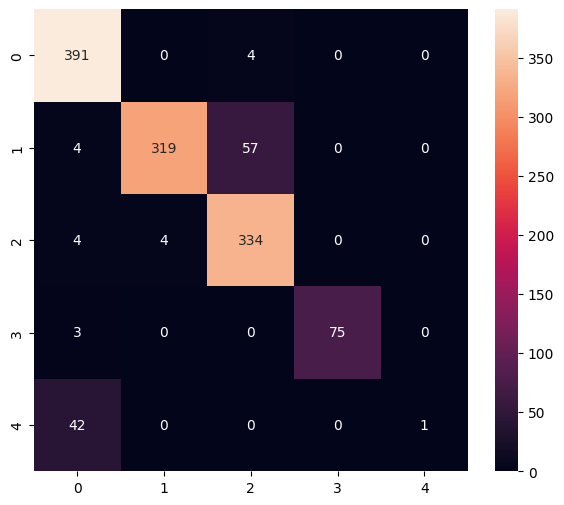

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       395
           1       0.99      0.84      0.91       380
           2       0.85      0.98      0.91       342
           3       1.00      0.96      0.98        78
           4       1.00      0.02      0.05        43

    accuracy                           0.90      1238
   macro avg       0.94      0.76      0.75      1238
weighted avg       0.92      0.90      0.89      1238



In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(Y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(Y_test, y_pred)

Tensorflow Lite

In [33]:
model.save(model_save_path, include_optimizer=False)

In [34]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/8y/p3929vr976j0cs_1v60frlqw0000gn/T/tmpfwbzbipf/assets


INFO:tensorflow:Assets written to: /var/folders/8y/p3929vr976j0cs_1v60frlqw0000gn/T/tmpfwbzbipf/assets


Saved artifact at '/var/folders/8y/p3929vr976j0cs_1v60frlqw0000gn/T/tmpfwbzbipf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  13067685520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13067691472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13067690128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13067688976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13067684752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13067689360: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1753542513.592394   53071 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1753542513.592644   53071 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1753542513.597366   53071 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled


6600

In [35]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/georgepapadopoulos/miniforge3/envs/hand_env/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [36]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [37]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))


In [38]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])


CPU times: user 575 μs, sys: 822 μs, total: 1.4 ms
Wall time: 780 μs


In [39]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.7131604e-01 6.8479385e-03 3.6176911e-04 1.5774550e-03 1.9896815e-02]
0
